# Check sqlite3 database

Chia-Hao Lee, cl2696@cornell.edu

Updated: 2024.09.05

In [1]:
import optuna
from collections import defaultdict
import os
from plotly.io import show # You'll need plotly and other packages to do the visualization in notebooks https://github.com/plotly/plotly.py#jupyterlab-support

In [2]:
work_dir = "H:\workspace\ptyrad"
os.chdir(work_dir)
print("Current working dir: ", os.getcwd())

Current working dir:  H:\workspace\ptyrad


In [18]:
study = optuna.load_study(study_name="tBL_WSe2_50iter_full", storage="sqlite:///hypertune.sqlite3")
fig = optuna.visualization.plot_contour(study)
show(fig)

In [19]:
trials = study.get_trials()

In [20]:
trials_dict = {}
pruned_count = 0
iters_count = 0
for trial in trials:
    trial_id = trial.number
    trials_dict[trial_id] = {'value': trial.value, 'params': trial.params, 'state': 'completed' if trial.state == 1 else 'pruned', 'iters': trial.last_step}
    pruned_count += 1 if trial.state == 2 else 0
    iters_count += trial.last_step
print(f"len(trials) = {len(trials)}")
print(f"pruned_count = {pruned_count}")
print(f"completed_count = {len(trials) - pruned_count}")
print(f"iters_count = {iters_count}")

len(trials) = 1000
pruned_count = 780
completed_count = 220
iters_count = 23710


In [21]:
trials_dict

{0: {'value': 0.24685456021688879,
  'params': {'scale': 1.1,
   'asymmetry': 0.15000000000000002,
   'rotation': 4.0,
   'shear': -2.0},
  'state': 'completed',
  'iters': 50},
 1: {'value': 0.24339347565546632,
  'params': {'scale': 0.8500000000000001,
   'asymmetry': 0.15000000000000002,
   'rotation': -2.0,
   'shear': 0.5},
  'state': 'completed',
  'iters': 50},
 2: {'value': 0.24138175137341022,
  'params': {'scale': 0.9500000000000001,
   'asymmetry': -0.04999999999999999,
   'rotation': 0.0,
   'shear': -0.5},
  'state': 'completed',
  'iters': 50},
 3: {'value': 0.2468944035936147,
  'params': {'scale': 1.1500000000000001,
   'asymmetry': -0.1,
   'rotation': 1.5,
   'shear': -1.0},
  'state': 'completed',
  'iters': 50},
 4: {'value': 0.2423503492027521,
  'params': {'scale': 1.0,
   'asymmetry': 0.10000000000000003,
   'rotation': -3.5,
   'shear': 4.0},
  'state': 'completed',
  'iters': 50},
 5: {'value': 0.2543914953712374,
  'params': {'scale': 0.9500000000000001,
   'a

In [22]:
def find_duplicates(trials_dict):
    # Reverse dictionary to map param sets to trial IDs
    params_to_trials = defaultdict(list)

    for trial_id, trial_data in trials_dict.items():
        # Extract and sort the parameter items (to ensure consistent ordering)
        params_tuple = tuple(sorted(trial_data['params'].items()))
        params_to_trials[params_tuple].append(trial_id)

    # Find sets of parameters that have more than one trial
    duplicates = {params: trials for params, trials in params_to_trials.items() if len(trials) > 1}

    return params_to_trials, duplicates

params_to_trials, duplicates = find_duplicates(trials_dict)

In [23]:
params_to_trials.items()

dict_items([((('asymmetry', 0.15000000000000002), ('rotation', 4.0), ('scale', 1.1), ('shear', -2.0)), [0]), ((('asymmetry', 0.15000000000000002), ('rotation', -2.0), ('scale', 0.8500000000000001), ('shear', 0.5)), [1]), ((('asymmetry', -0.04999999999999999), ('rotation', 0.0), ('scale', 0.9500000000000001), ('shear', -0.5)), [2]), ((('asymmetry', -0.1), ('rotation', 1.5), ('scale', 1.1500000000000001), ('shear', -1.0)), [3]), ((('asymmetry', 0.10000000000000003), ('rotation', -3.5), ('scale', 1.0), ('shear', 4.0)), [4, 46]), ((('asymmetry', 0.10000000000000003), ('rotation', 2.0), ('scale', 0.9500000000000001), ('shear', -3.0)), [5]), ((('asymmetry', 0.2), ('rotation', -3.0), ('scale', 0.9), ('shear', 1.0)), [6]), ((('asymmetry', -0.15000000000000002), ('rotation', -1.0), ('scale', 1.0), ('shear', -4.0)), [7]), ((('asymmetry', -0.15000000000000002), ('rotation', 2.0), ('scale', 1.05), ('shear', 3.5)), [8]), ((('asymmetry', -0.15000000000000002), ('rotation', 2.0), ('scale', 0.8), ('sh

In [24]:
trials_per_param = []
for params, trial_indices in params_to_trials.items():
    trials_per_param.append(len(trial_indices))

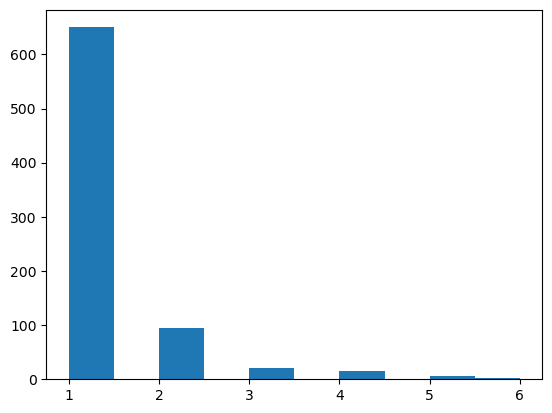

(array([650.,   0.,  94.,   0.,  20.,   0.,  15.,   0.,   6.,   2.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

In [27]:
import matplotlib.pyplot as plt
plt.figure()
hist = plt.hist(trials_per_param, bins=10)
plt.show()
hist

In [28]:
650+94*2+20*3+15*4+5*6+6*2

1000

In [29]:
# Print results
print(f"Total unique sets of parameters: {len(params_to_trials)}")
print(f"Number of duplicate parameter sets: {len(duplicates)}\n")

num_duplicates = []

for duplicated_params, duplicated_trials in duplicates.items():
    formatted_params = {k: f"{v:.2g}" if isinstance(v, float) else v for k, v in dict(duplicated_params).items()}
    num_duplicates.append(len(duplicated_trials))
    print(f"Params: {dict(formatted_params)}")
    for trial_id in duplicated_trials:
        trial_data = trials_dict[trial_id]
        print(f"  Trial ID: {trial_id}, Value: {trial_data['value']:.5f}, State: {trial_data['state']}, Iters: {trial_data['iters']}")
    print()  # Add an empty line for better readability

Total unique sets of parameters: 787
Number of duplicate parameter sets: 137

Params: {'asymmetry': '0.1', 'rotation': '-3.5', 'scale': '1', 'shear': '4'}
  Trial ID: 4, Value: 0.24235, State: completed, Iters: 50
  Trial ID: 46, Value: 0.25524, State: pruned, Iters: 10

Params: {'asymmetry': '0.05', 'rotation': '-1.5', 'scale': '0.95', 'shear': '-2'}
  Trial ID: 24, Value: 0.25416, State: pruned, Iters: 10
  Trial ID: 694, Value: 0.25453, State: pruned, Iters: 10

Params: {'asymmetry': '0.05', 'rotation': '-2.5', 'scale': '0.95', 'shear': '2'}
  Trial ID: 41, Value: 0.24103, State: completed, Iters: 50
  Trial ID: 449, Value: 0.25606, State: pruned, Iters: 5

Params: {'asymmetry': '0', 'rotation': '-4', 'scale': '0.95', 'shear': '1.5'}
  Trial ID: 71, Value: 0.24109, State: completed, Iters: 50
  Trial ID: 100, Value: 0.25441, State: pruned, Iters: 10

Params: {'asymmetry': '-0.05', 'rotation': '-3.5', 'scale': '0.85', 'shear': '-3'}
  Trial ID: 85, Value: 0.24285, State: completed, I